In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Parameters
num_days = 365 * 2  # 2 years of daily data
num_customers = 100
num_widgets = 50
date_start = datetime(2022, 1, 1)

# Function to generate increasing sales quantity
def generate_increasing_sales(num_days, num_customers, max_quantity):
    base_quantities = np.linspace(1, max_quantity, num_days)  # Linearly increasing base quantities
    sales_data = []
    
    for day in range(num_days):
        daily_base_quantity = base_quantities[day]
        daily_sales = daily_base_quantity + np.random.randint(0, 5, num_customers)  # Adding randomness
        sales_data.extend(daily_sales)
    
    return sales_data

# Generate the date range
dates = [date_start + timedelta(days=i) for i in range(num_days)]

# Generate the data with the increasing sales trend
data_with_trend = {
    'Date': np.repeat(dates, num_customers),
    'CustomerID': np.tile(np.arange(1, num_customers + 1), num_days),
    'WidgetID': np.random.choice(np.arange(1, num_widgets + 1), num_days * num_customers),
    'QuantitySold': generate_increasing_sales(num_days, num_customers, 20)  # Max quantity increases up to 20
}

# Create DataFrame
df = pd.DataFrame(data_with_trend)

# Save to CSV
file_path_with_trend = '/Users/jamesfordham/Documents/widget_sales_data_with_trend.csv'
df.to_csv(file_path_with_trend, index=False)

#file_path_with_trend


In [2]:
df.head()


,Date,CustomerID,WidgetID,QuantitySold
0,2022-01-01,1,11,4.0
1,2022-01-01,2,44,4.0
2,2022-01-01,3,35,4.0
3,2022-01-01,4,11,1.0
4,2022-01-01,5,14,1.0


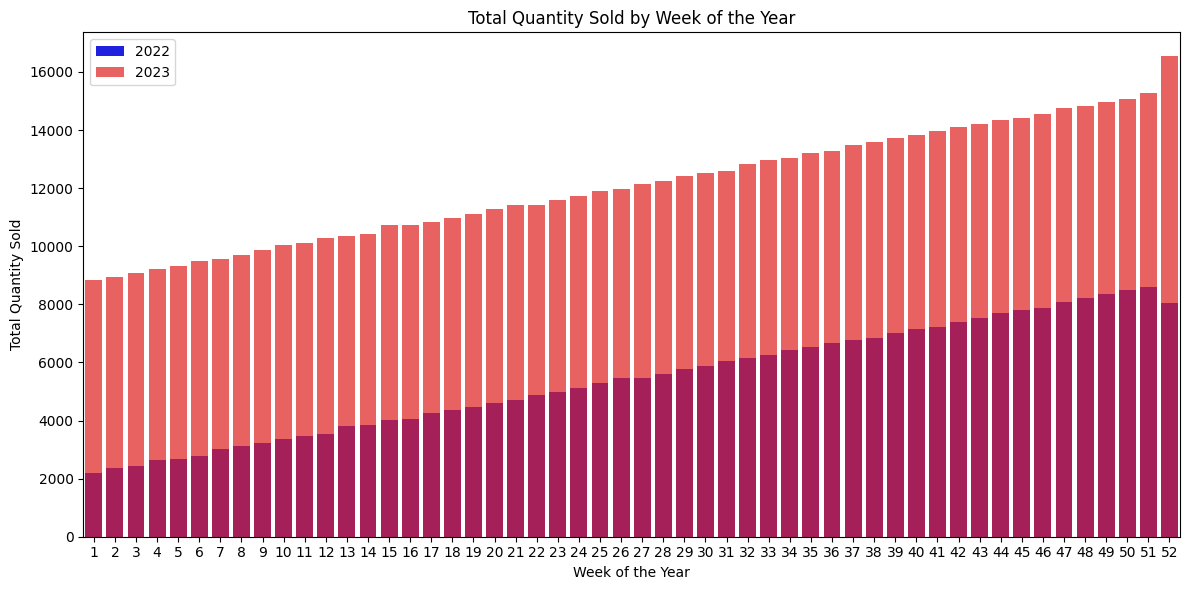

In [3]:
#create a year and week of the year column
df['Year'] = df['Date'].dt.year
df['WeekOfYear'] = df['Date'].dt.isocalendar().week

#create a bar chart showing the number of widgets sold by week of the year compared across the two years
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and week of the year
df_grouped = df.groupby(['Year', 'WeekOfYear'], as_index=False).agg({'QuantitySold': 'sum'})

# Pivot the data
df_pivot = df_grouped.pivot(index='WeekOfYear', columns='Year', values='QuantitySold')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=df_pivot.index, y=df_pivot[2022], color='b', label='2022')
sns.barplot(x=df_pivot.index, y=df_pivot[2023], color='r', alpha=0.7, label='2023')
plt.xlabel('Week of the Year')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold by Week of the Year')
plt.legend()
plt.tight_layout()
plt.show()

#save the plot 
#plot_path = '/mnt/data/total_quantity_sold_by_week_of_year.png'
#plt.savefig(plot_path)


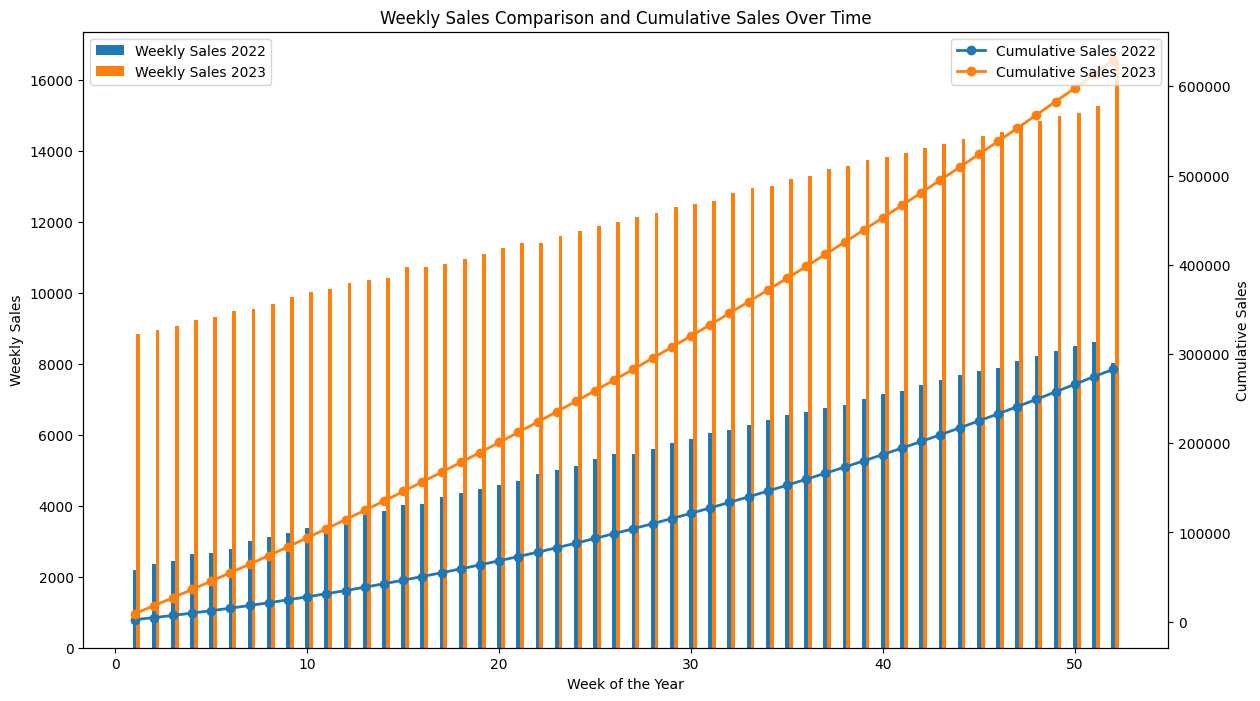

In [4]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and week from the date
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week

# Aggregate the data by week and year
weekly_sales = df.groupby(['Year', 'Week'])['QuantitySold'].sum().reset_index()

# Compute cumulative sales for each year
weekly_sales['CumulativeSales'] = weekly_sales.groupby('Year')['QuantitySold'].cumsum()

# Create the bar chart and line graph
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot bar chart for weekly sales
for year in weekly_sales['Year'].unique():
    yearly_data = weekly_sales[weekly_sales['Year'] == year]
    ax1.bar(yearly_data['Week'] + (year - weekly_sales['Year'].min()) * 0.2, 
            yearly_data['QuantitySold'], width=0.2, label=f'Weekly Sales {year}')

ax1.set_xlabel('Week of the Year')
ax1.set_ylabel('Weekly Sales')
ax1.legend(loc='upper left')
ax1.set_title('Weekly Sales Comparison and Cumulative Sales Over Time')

# Create a second y-axis for the cumulative sales line graph
ax2 = ax1.twinx()

# Plot line graph for cumulative sales
for year in weekly_sales['Year'].unique():
    yearly_data = weekly_sales[weekly_sales['Year'] == year]
    ax2.plot(yearly_data['Week'], yearly_data['CumulativeSales'], 
             marker='o', linestyle='-', label=f'Cumulative Sales {year}', linewidth=2)

ax2.set_ylabel('Cumulative Sales')
ax2.legend(loc='upper right')

plt.show()


In [5]:
import pandas as pd
import plotly.graph_objects as go

# Load the data from the CSV file


# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and week from the date
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week

# Aggregate the data by week and year
weekly_sales = df.groupby(['Year', 'Week'])['QuantitySold'].sum().reset_index()

# Compute cumulative sales for each year
weekly_sales['CumulativeSales'] = weekly_sales.groupby('Year')['QuantitySold'].cumsum()

# Create the bar chart and line graph using Plotly
fig = go.Figure()

# Add bar charts for weekly sales
for year in weekly_sales['Year'].unique():
    yearly_data = weekly_sales[weekly_sales['Year'] == year]
    fig.add_trace(go.Bar(
        x=yearly_data['Week'],
        y=yearly_data['QuantitySold'],
        name=f'Weekly Sales {year}',
        offsetgroup=str(year),  # Convert year to string for offsetgroup
        hoverinfo='text',
        text=[f'Year: {year}<br>Week: {week}<br>Sales: {sales}' 
              for week, sales in zip(yearly_data['Week'], yearly_data['QuantitySold'])]
    ))

# Add line charts for cumulative sales
for year in weekly_sales['Year'].unique():
    yearly_data = weekly_sales[weekly_sales['Year'] == year]
    fig.add_trace(go.Scatter(
        x=yearly_data['Week'],
        y=yearly_data['CumulativeSales'],
        name=f'Cumulative Sales {year}',
        mode='lines+markers',
        yaxis='y2',
        hoverinfo='text',
        text=[f'Year: {year}<br>Week: {week}<br>Cumulative Sales: {cum_sales}' 
              for week, cum_sales in zip(yearly_data['Week'], yearly_data['CumulativeSales'])]
    ))

# Update layout for dual y-axes
fig.update_layout(
    title='Weekly Sales Comparison and Cumulative Sales Over Time',
    xaxis=dict(title='Week of the Year'),
    yaxis=dict(title='Weekly Sales'),
    yaxis2=dict(title='Cumulative Sales', overlaying='y', side='right'),
    legend=dict(x=0.1, y=1.1, orientation='h')
)

fig.show()


In [6]:
# generate a simple 3D graph
import plotly.graph_objects as go
import numpy as np

vec1 = np.array([1, 2, 3])
vec2 = np.array([2, 3, 4])
vec3 = np.cross(vec1, vec2)

# plot the vectors in 3D

fig = go.Figure(data=[
    go.Scatter3d(x=[0, vec1[0]], y=[0, vec1[1]], z=[0, vec1[2]], marker=dict(size=[5, 12], color='blue')),
    go.Scatter3d(x=[0, vec2[0]], y=[0, vec2[1]], z=[0, vec2[2]], marker=dict(size=[5, 12], color='red')),
    go.Scatter3d(x=[0, vec3[0]], y=[0, vec3[1]], z=[0, vec3[2]], marker=dict(size=[5, 12], color='green'))
])

fig.show()

In [7]:
import streamlit as st
import pandas as pd
import altair as alt

# Sample DataFrame
data = {
    'Customer': ['Customer 1', 'Customer 2', 'Customer 3', 'Customer 4'],
    'Product': ['A', 'B', 'C', 'D'],
    'Sales Volume': [100, 200, 150, 300],
    'Profit Margin': [0.1, 0.15, 0.2, 0.25]
}

df = pd.DataFrame(data)

# Sidebar widgets for filtering
customer_filter = st.sidebar.multiselect('Select Customers', df['Customer'].unique())
product_filter = st.sidebar.multiselect('Select Products', df['Product'].unique())

# Filter the DataFrame
filtered_df = df[df['Customer'].isin(customer_filter) & df['Product'].isin(product_filter)]

# Interactive chart
chart = alt.Chart(filtered_df).mark_bar().encode(
    x='Customer',
    y='Sales Volume',
    color='Product',
    tooltip=['Customer', 'Product', 'Sales Volume', 'Profit Margin']
).properties(
    width=600,
    height=400
).interactive()

st.write(chart)


2024-06-05 18:06:33.132 
  command:

    streamlit run /Users/jamesfordham/.venvs/mint_env/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]
